# [매일10분 데이터 분석] 데이터 시각화를 쉽게 해보자 (그래프 작성 Seaborn,  Matplot)

### 데이터 타입에 따른 시각화 유형
#### 단일변수

|데이터 타입|유형|
|:-----------:|:--------------|
|수치형|확률분포 또는 히스토그램|
|범주형|빈도수 그래프(Bar / Pie Chart)|

#### 다변수

|데이터 타입|유형|
|:-----------:|:--------------|
|Y: 연속 / X: 연속 |산점도 / 회귀 그래프 / 히트맵|
|Y: 연속 / X: 범주|막대 그래프 / 상자그림|
|Y: 연속 / X: 시간(순서)|선 그래프 / 포인트 그래프|

#### 데이터 시각화
- Matlplot: MATLAB 인터페이스 기반, 다양한 옵션을 사용해서 정교한 그래프 작성 가능
- Seaborn: Matplot 라이브러리를 기반, 통계 전용 시각화, Pandas 라이브러리와 연계가 잘 됨

#### 실무에서 데이터를 분석하기 전 꼭 봐야할 것들
   - 데이터 구조(index, column, value)
   - 데이터 타입
   - 어떤 데이터(key 값)를 기준으로 정렬되어 있는지

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('data03.csv')
df1.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [ ]:
해당 데이터는 datetime을 기준으로 정렬되어 있다.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

## 1. 단일변수 시각화

In [5]:
import seaborn as sns

### 1) 막대 그래프(sns.countplot)

#### 문제 발생 (한글 폰트 깨짐, 그래프 및 범례 위치 조정 필요)

In [7]:
df1['type_of_contract'].value_counts()

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49901 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47116 missing from current

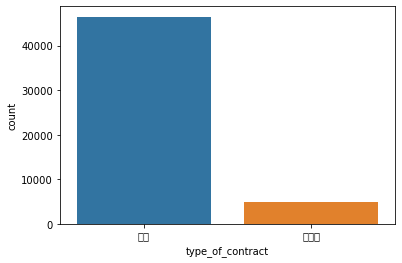

In [10]:
sns.countplot(data=df1, x='type_of_contract')

한글 폰트 깨짐 현상이 발생한다.

In [11]:
df1['product'].value_counts()

K1    39134
K2     8995
K3     2082
K5      645
K4      327
K6      120
Name: product, dtype: int64

<AxesSubplot:xlabel='product', ylabel='count'>

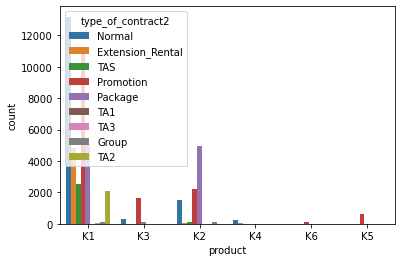

In [13]:
# type_of_contract2별(hue)로 product 빈도수 파악
sns.countplot(data=df1, x = 'product', hue='type_of_contract2')

그래프 크기가 작으며 범례의 위치 조정이 필요하다.

#### 문제 해결 (한글 폰트 적용, 그래프 크기 및 범례 위치 조정)

In [15]:
import matplotlib.pyplot as plt # 그래프 출력과 직접적인 연관이 있는 옵션을 사용할 때 이용
import matplotlib as mpl # 외부적인 부분(한글 폰트, 글씨체, 음수 기호 표시)을 지정할 때 이용

In [16]:
# 한글 폰트 적용(맑은 고딕)
mpl.rc('font', family = 'Malgun Gothic')

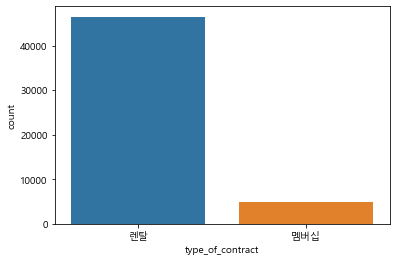

In [20]:
sns.countplot(data=df1, x='type_of_contract');

한글 글씨체가 깨지지 않고 정상적으로 출력된다.

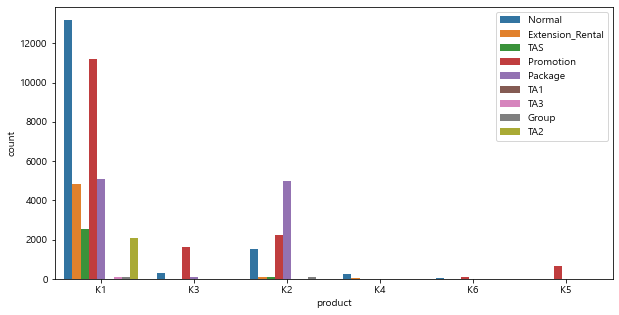

In [28]:
# 그래프 크기 및 범례 위치 조정
plt.figure(figsize=(10, 5)) # x축, y축
sns.countplot(data=df1, x = 'product', hue='type_of_contract2')
plt.legend(loc = 'upper right') # 그래프 출력 후 범례 위치를 조정한다.

# 시각화 산출물을 파일로 저정하기
plt.savefig('img.png')
plt.savefig('img.pdf')

그래프의 크기가 이전보다 커졌으며 범례 위치도 적절하게 배치했다.

#### 문제 발생 (x축 레이블 겹침, 빈도수가 높은 상위 데이터만 추출)

<AxesSubplot:xlabel='bank', ylabel='count'>

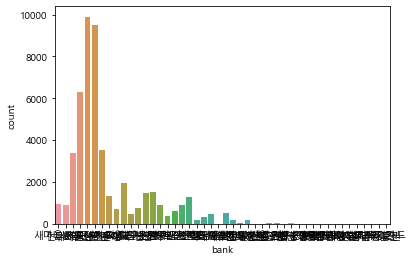

In [35]:
sns.countplot(data=df1, x='bank')

#### 문제 해결 (x축 레이블 겹침 현상)

위 그래프는 x축 레이블이 겹쳐있고 막대 그래프가 크기 순으로 정렬되어 있지 않은 모습이다.

<AxesSubplot:xlabel='count', ylabel='bank'>

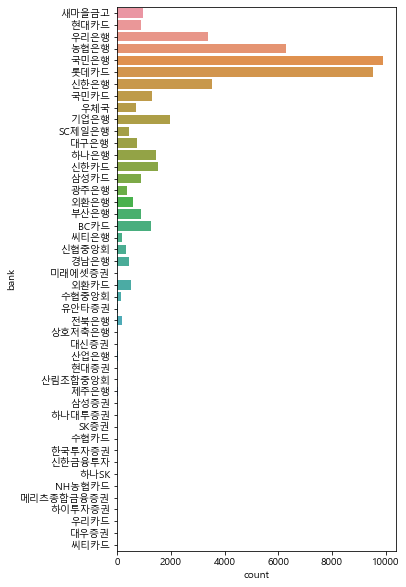

In [40]:
# y축으로 지정해서 x축 레이블 겹침 현상 해결
plt.figure(figsize=[5,10])
sns.countplot(data=df1, y='bank')

#### 문제 해결 (빈도수가 높은 몇 개 데이터만 출력)

In [41]:
# 빈도수 파악(빈도수가 높은 순서대로 정렬됨)
df1['bank'].value_counts()

국민은행         9901
롯데카드         9518
농협은행         6278
신한은행         3522
우리은행         3386
기업은행         1963
신한카드         1533
하나은행         1446
국민카드         1311
BC카드         1264
새마을금고         964
부산은행          888
삼성카드          884
현대카드          876
대구은행          746
우체국           717
외환은행          586
외환카드          530
경남은행          442
SC제일은행        439
광주은행          347
신협중앙회         341
전북은행          195
씨티은행          162
수협중앙회         160
제주은행           40
유안타증권          27
산업은행           23
현대증권           11
삼성증권            7
하나SK            6
미래에셋증권          5
신한금융투자          4
한국투자증권          4
NH농협카드          4
우리카드            3
대우증권            2
씨티카드            1
하이투자증권          1
산림조합중앙회         1
SK증권            1
하나대투증권          1
대신증권            1
메리츠종합금융증권       1
수협카드            1
상호저축은행          1
Name: bank, dtype: int64

<AxesSubplot:xlabel='bank', ylabel='count'>

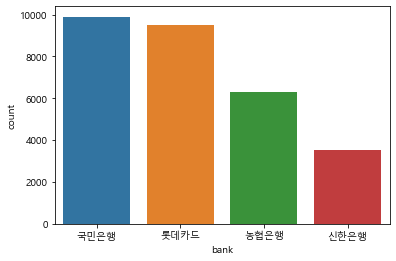

In [44]:
# '국민은행','롯데카드','농협은행','신한은행' 순서로 정렬(order)
sns.countplot(data=df1, x = 'bank', order=['국민은행','롯데카드','농협은행','신한은행'])

다른 은행명은 사라진다.

In [49]:
# 'bank' 컬럼의 인덱스 확인(빈도수가 많은 순서대로 정렬됨) 및 리스트로 변환
df1['bank'].value_counts().index.tolist()

['국민은행',
 '롯데카드',
 '농협은행',
 '신한은행',
 '우리은행',
 '기업은행',
 '신한카드',
 '하나은행',
 '국민카드',
 'BC카드',
 '새마을금고',
 '부산은행',
 '삼성카드',
 '현대카드',
 '대구은행',
 '우체국',
 '외환은행',
 '외환카드',
 '경남은행',
 'SC제일은행',
 '광주은행',
 '신협중앙회',
 '전북은행',
 '씨티은행',
 '수협중앙회',
 '제주은행',
 '유안타증권',
 '산업은행',
 '현대증권',
 '삼성증권',
 '하나SK',
 '미래에셋증권',
 '신한금융투자',
 '한국투자증권',
 'NH농협카드',
 '우리카드',
 '대우증권',
 '씨티카드',
 '하이투자증권',
 '산림조합중앙회',
 'SK증권',
 '하나대투증권',
 '대신증권',
 '메리츠종합금융증권',
 '수협카드',
 '상호저축은행']

In [50]:
# 변수 저장
order_list = df1['bank'].value_counts().index.tolist()

Text(0.5, 1.0, '고객사의 상위 10개 은행사')

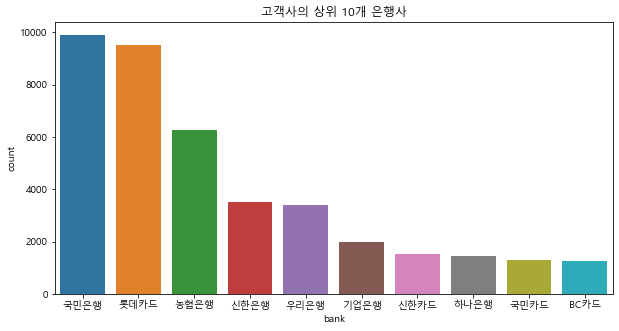

In [58]:
# 빈도수가 높은 상위 10개 데이터만 출력
# 고객사의 상위 10개 은행사
plt.figure(figsize=[10,5])
sns.countplot(data=df1, x='bank', order=order_list[0:10])
plt.title('고객사의 상위 10개 은행사')

### 2) 히스토그램

<AxesSubplot:title={'center':'계약 유형별, 고객 연령 분포'}, xlabel='age', ylabel='Count'>

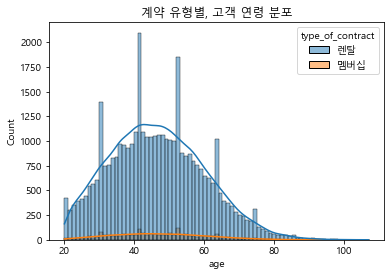

In [32]:
# 제목 및 확률분포 곡선 그래프(distribution) 추가
plt.title('계약 유형별, 고객 연령 분포')
sns.histplot(data=df1, x='age', kde = True, hue='type_of_contract')
# plt.savefig('히스토그램.png')